### Análise Exploratória de Dados


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 21)

In [46]:
financial_data = pd.read_csv(r"/kaggle/input/financial-data-d3/german.data", sep=' ', header=None,
                             names=[f'atr{i}' for i in range(1, 22)])

#### Verificando a quantidade de linhas e colunas:

In [47]:
financial_data.shape

(1000, 21)

#### As 5 primeiras linhas do dataset:

In [48]:
financial_data.head()


,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,atr11,atr12,atr13,atr14,atr15,atr16,atr17,atr18,atr19,atr20,atr21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


#### verificando os tipos de dados das colunas

In [49]:
financial_data.dtypes

atr1     object
atr2      int64
atr3     object
atr4     object
atr5      int64
atr6     object
atr7     object
atr8      int64
atr9     object
atr10    object
atr11     int64
atr12    object
atr13     int64
atr14    object
atr15    object
atr16     int64
atr17    object
atr18     int64
atr19    object
atr20    object
atr21     int64
dtype: object

#### Verificando se há valores vazios:

In [50]:
financial_data.isna().sum()

atr1     0
atr2     0
atr3     0
atr4     0
atr5     0
atr6     0
atr7     0
atr8     0
atr9     0
atr10    0
atr11    0
atr12    0
atr13    0
atr14    0
atr15    0
atr16    0
atr17    0
atr18    0
atr19    0
atr20    0
atr21    0
dtype: int64

#### Visualizando a relação entre das features e a response variable  

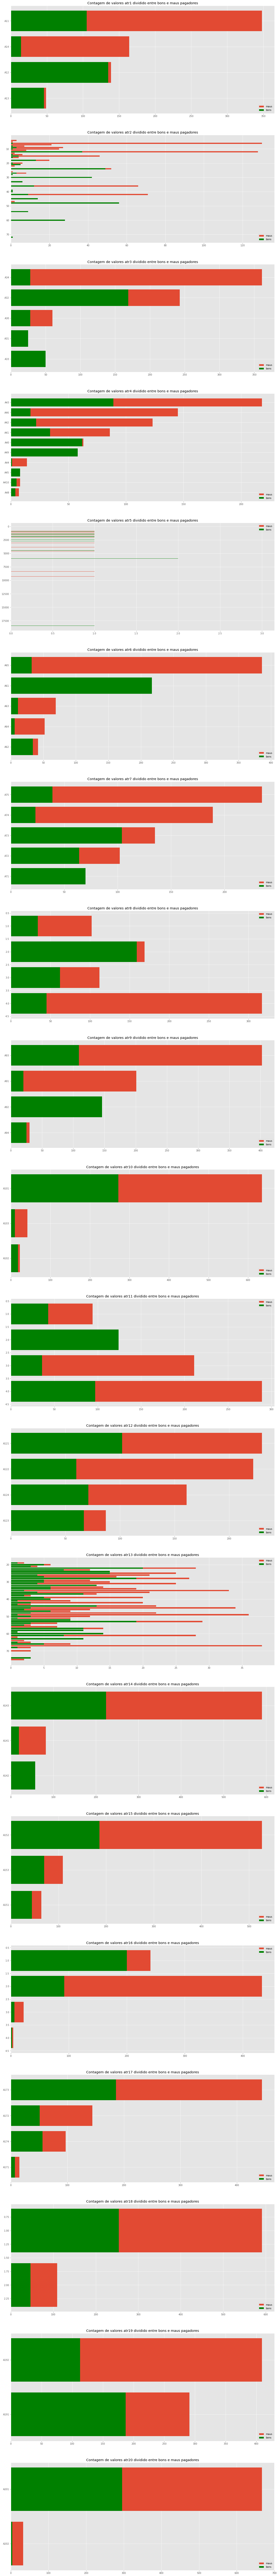

In [51]:
fig, ax = plt.subplots(20)
fig.set_size_inches([20, 200])


for label in range(0, 20):
    maus_pagadores = financial_data.query('atr21 == 1')
    bons_pagadores = financial_data.query('atr21 == 2')
    
    coluna_maus_pagadores = maus_pagadores.iloc[:, label]
    coluna_bons_pagadores = bons_pagadores.iloc[:, label]

    #ax[label].barh(atributo_coluna.unique().astype('str'), atributo_coluna.value_counts())
    ax[label].barh(coluna_maus_pagadores.unique(), coluna_maus_pagadores.value_counts())
    ax[label].barh(coluna_bons_pagadores.unique(), coluna_bons_pagadores.value_counts(), color='green')
    ax[label].set_title(f'Contagem de valores atr{str(label + 1)} dividido entre bons e maus pagadores')
    ax[label].legend(['maus', 'bons'])
    ax[label].invert_yaxis()
    

# Regressão Logística

In [52]:
from sklearn import linear_model

Convertendo os dados fornecidos para número pois o metódo que utilizarei da bibliote sklearn só lida com números e fazendo os tratamentos necessários.

In [53]:
processed_financial_data = financial_data.replace('A', '', regex=True).astype('int')
cols_caracteristicas_financeiras = processed_financial_data.drop(columns=['atr21'])
col_response_variable = processed_financial_data['atr21']

Criando o modelo em si:

In [54]:
modelo_reglog = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=1000)

modelo_reglog.fit(X=cols_caracteristicas_financeiras, y=col_response_variable)

print(modelo_reglog.intercept_)

print(modelo_reglog.coef_)

[0.00065096]
[[-6.00320504e-01  2.39761764e-02 -3.56709163e-01 -1.98237205e-03
   5.91273252e-05 -1.83779526e-01 -1.41387785e-01  2.24361712e-01
  -1.10512907e-01 -1.92945591e-02  5.08602929e-02  2.19616517e-01
  -1.43512517e-02 -1.16907189e-01  2.34829676e-02  1.22395710e-02
   6.62648890e-02  1.66064522e-02  3.76983967e-02  9.27910835e-02]]


Comparando os resultados do modelo com os valores reais com uma tabela da confusão:

In [55]:
previsoes_reglog = modelo_reglog.predict(X=cols_caracteristicas_financeiras)

pd.crosstab(previsoes_reglog, col_response_variable)

atr21,1,2
row_0,,
1,625,163
2,75,137


### A acurácia do modelo é:

In [56]:
modelo_reglog.score(X=cols_caracteristicas_financeiras, y=col_response_variable)

0.762

# Naive Bayes

O segundo modelo que eu decidi utilizar para comparar com a regressão logística é o Naive Bayes, que já é utilizado em análise de crédito


In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
modelo_naive = MultinomialNB()
modelo_naive.fit(cols_caracteristicas_financeiras, col_response_variable)

MultinomialNB()

In [59]:
previsoes_naive = modelo_naive.predict(X=cols_caracteristicas_financeiras)
pd.crosstab(previsoes_naive, col_response_variable)

atr21,1,2
row_0,,
1,495,181
2,205,119


### A acurácia do modelo Naive Bayes é:

In [60]:
modelo_naive.score(X=cols_caracteristicas_financeiras, y=col_response_variable)

0.614

# Conclusão

A partir dessa pequeno teste dos dois modelos, é possivel ver que o modelo de regressão logística tem vantagem pela questão da maior acurácia, outros fatores, como sensibilidade, não foram levados em conta.